In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

%matplotlib inline

In [2]:
dataset = pd.read_csv("./Homework_Datasets/truffle.csv")

In [3]:
dataset.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,class
0,0,-0.033113,-0.249829,0.025251,-0.314066,0.677100,-0.419916,0.124664,0.402630,0.616211,-0.201350,0.105603,-0.185232,1
1,1,0.774309,-0.179760,0.756299,-0.347095,0.187453,-0.147049,0.423457,0.391480,-0.192206,-0.237324,0.673986,0.093249,1
2,2,-0.025437,0.160003,-0.092386,0.749130,0.243887,-0.332927,-0.491288,0.368015,-0.465411,-0.698225,0.779238,-0.600391,1
3,3,-0.698300,-0.229736,-0.591785,0.598763,0.633405,-0.503759,-0.539623,-0.778622,0.195602,-0.074796,-0.497269,0.003554,1
4,4,0.512090,-0.758130,-0.362288,0.520328,0.769455,-0.589789,-0.078329,-0.120611,0.735147,-0.657055,0.368922,0.157426,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   0           10000 non-null  float64
 2   1           10000 non-null  float64
 3   2           10000 non-null  float64
 4   3           10000 non-null  float64
 5   4           10000 non-null  float64
 6   5           10000 non-null  float64
 7   6           10000 non-null  float64
 8   7           10000 non-null  float64
 9   8           10000 non-null  float64
 10  9           10000 non-null  float64
 11  10          10000 non-null  float64
 12  11          10000 non-null  float64
 13  class       10000 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 1.1 MB


In [5]:
dataset.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,class
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,-0.001069,-0.010881,0.009850,0.001174,0.006780,-0.001783,-0.001013,0.006449,0.000237,-0.001323,0.003368,-0.000003,0.943600
std,2886.89568,0.453065,0.456474,0.455465,0.455424,0.451496,0.452801,0.455110,0.456201,0.455624,0.457215,0.453266,0.455598,0.230704
min,0.00000,-0.785372,-0.785259,-0.785275,-0.785183,-0.785337,-0.785397,-0.785332,-0.785196,-0.785282,-0.785384,-0.785254,-0.785153,0.000000
25%,2499.75000,-0.395845,-0.410032,-0.382615,-0.398118,-0.380617,-0.391126,-0.394733,-0.391097,-0.387760,-0.398669,-0.392213,-0.398109,1.000000
50%,4999.50000,0.000121,-0.016959,0.009032,0.005297,0.007770,-0.003785,0.003306,0.015549,-0.009830,-0.003453,0.005636,-0.001243,1.000000
75%,7499.25000,0.389581,0.389347,0.408313,0.400236,0.400758,0.384820,0.387820,0.400472,0.400283,0.401657,0.399699,0.393905,1.000000
max,9999.00000,0.785334,0.785322,0.785380,0.785250,0.785191,0.785361,0.785297,0.785390,0.785160,0.785345,0.785245,0.785057,1.000000


<Axes: xlabel='class', ylabel='11'>

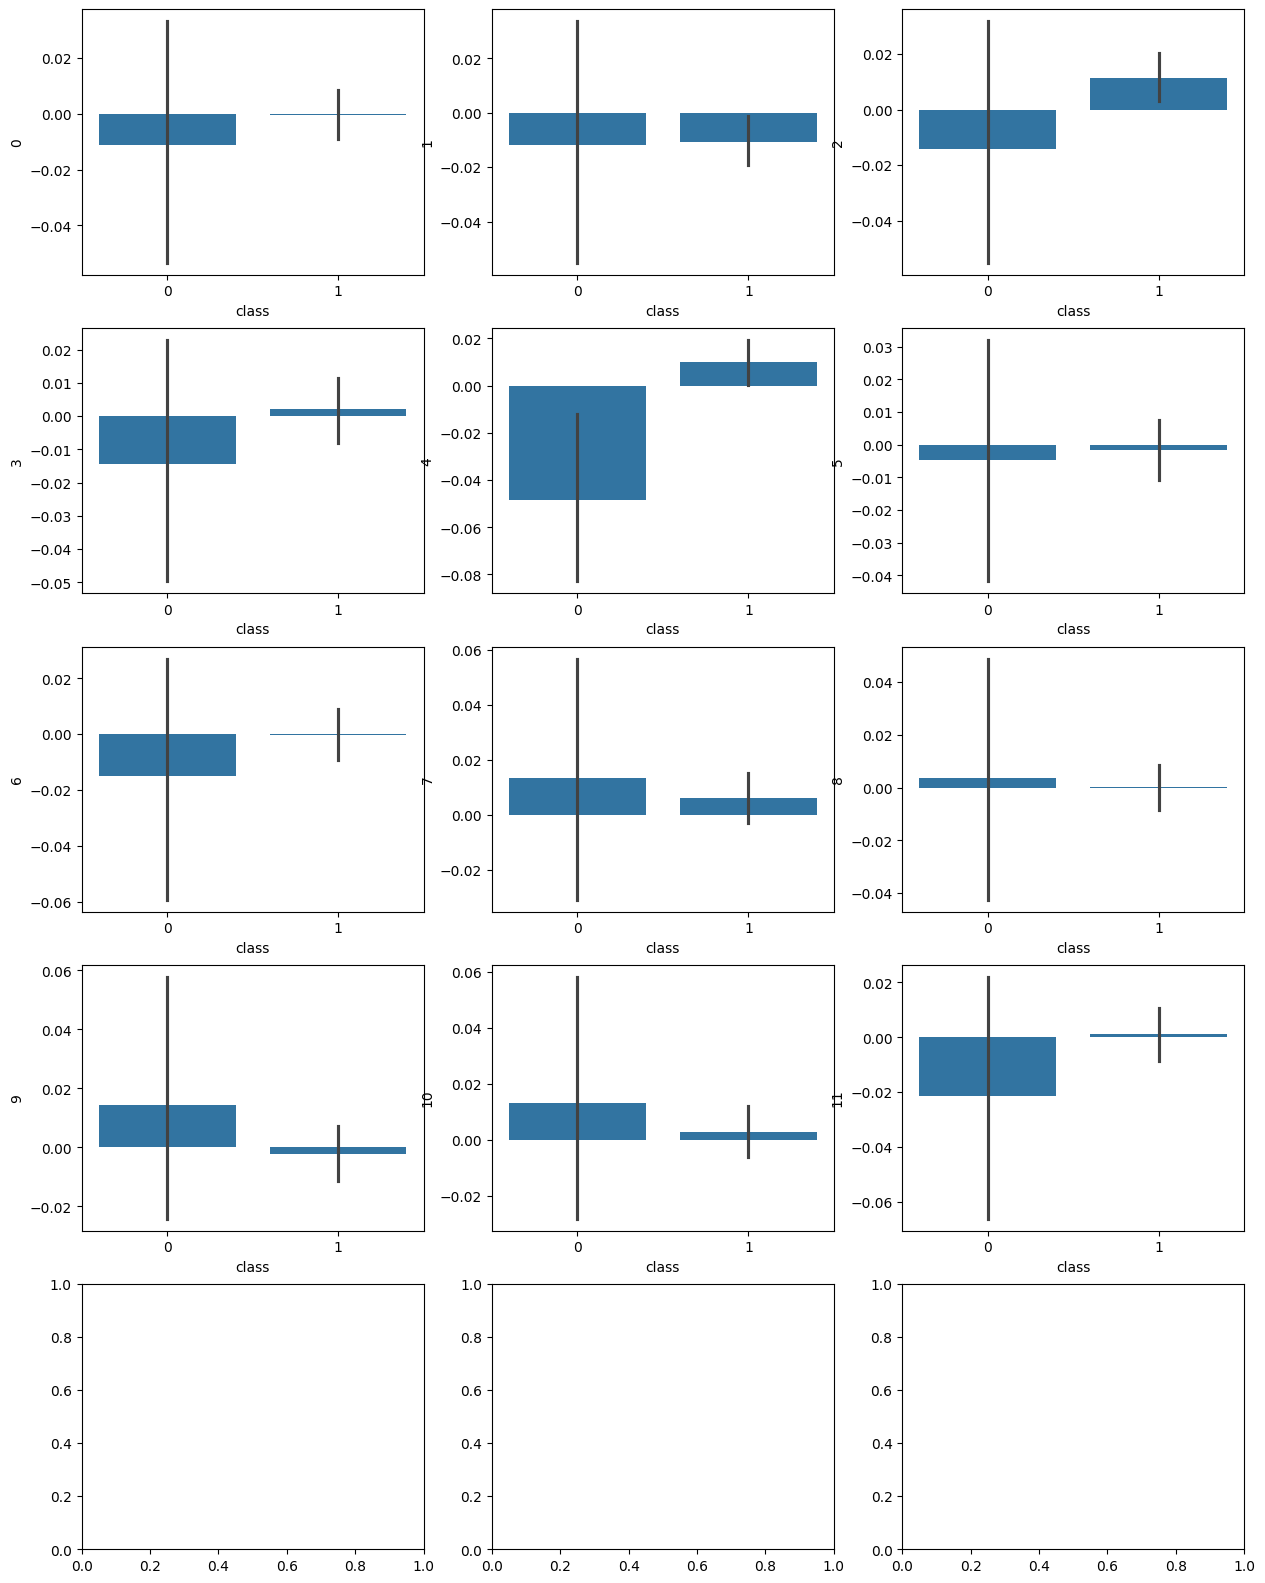

In [6]:
fig, ax = plt.subplots(4,3 , figsize = (15,20)) # Making Subplots

sns.barplot(data = dataset, y ="0", x="class", ax=ax[0,0])
sns.barplot(data = dataset, y ="1", x="class", ax=ax[0,1])
sns.barplot(data = dataset, y ="2", x="class", ax=ax[0,2])
sns.barplot(data = dataset, y ="3", x="class", ax=ax[1,0])
sns.barplot(data = dataset, y ="4", x="class", ax=ax[1,1])
sns.barplot(data = dataset, y ="5", x="class", ax=ax[1,2])
sns.barplot(data = dataset, y ="6", x="class", ax=ax[2,0])
sns.barplot(data = dataset, y ="7", x="class", ax=ax[2,1])
sns.barplot(data = dataset, y ="8", x="class", ax=ax[2,2])
sns.barplot(data = dataset, y ="9", x="class", ax=ax[3,0])
sns.barplot(data = dataset, y ="10", x="class", ax=ax[3,1])
sns.barplot(data = dataset, y ="11", x="class", ax=ax[3,2])

In [7]:
# Splitting datset to X and y axis 

X=dataset.iloc[: , 1:13].values
y=dataset.iloc[: ,-1].values

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [9]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
classifier = SVC(kernel='rbf', random_state = 42)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [11]:
y_pred=classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
final_classifier = classifier    # since max quality is for SVM so we have stored this in a final variable

In [12]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  62   60]
 [   1 1877]]


0.9695

In [13]:
classifier = SVC(kernel='linear', random_state = 42)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=1)

In [14]:
y_pred=classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
final_classifier = classifier    # since max quality is for SVM so we have stored this in a final variable

In [15]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[   0  122]
 [   0 1878]]


0.939

In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for different SVC models
svm_linear = {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}
svm_others = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 'auto'],
              'kernel': ['poly', 'rbf', 'sigmoid']}

# Combine the parameter grids
parameters = [svm_linear, svm_others]

# Create an SVC model
svc_model = SVC()

# Perform grid search
grid_search = GridSearchCV(svc_model, param_grid=parameters, cv=5, verbose=2)
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score:.4f}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END ................................C=10, kernel=linear; total time=   0.2s
[CV] END ................................C=10, 

In [18]:
# Retraining an SVC model with the best parameters
best_svc = SVC(C=100,kernel='rbf', gamma='auto')
best_svc.fit(X_train, y_train)

# Make predictions on the test data
svc_pred = best_svc.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

accuracy_score(y_test, svc_pred)

[[  91   31]
 [  15 1863]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       122
           1       0.98      0.99      0.99      1878

    accuracy                           0.98      2000
   macro avg       0.92      0.87      0.89      2000
weighted avg       0.98      0.98      0.98      2000



0.977